In [28]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


You can find this data in https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#reading data
credit_card = pd.read_csv(r"C:\Users\felip\Downloads\archive\creditcard.csv")
#showing the distribution of each class: fraud and not fraud
print("\nClass distribution:")
class_distribution = credit_card['Class'].value_counts().rename(index={0: 'Not fraudulent', 1: 'Fraudulent'})
print(class_distribution)
fraud_percentage = (class_distribution['Fraudulent'] / class_distribution.sum()) * 100
print(f"The percentage of fraud was: {fraud_percentage:.2f}%")

# cleaning the data

cleanedData=credit_card.dropna()


Class distribution:
Class
Not fraudulent    284315
Fraudulent           492
Name: count, dtype: int64
The percentage of fraud was: 0.17%


By analyzing this data it is possible to see the number of fraudulent and non-fraudulent transactions, in addition it is possible to see that the percentage of real transactions far exceeds the number of fraudulent transactions.

Fraud Transactions Statistics:
count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


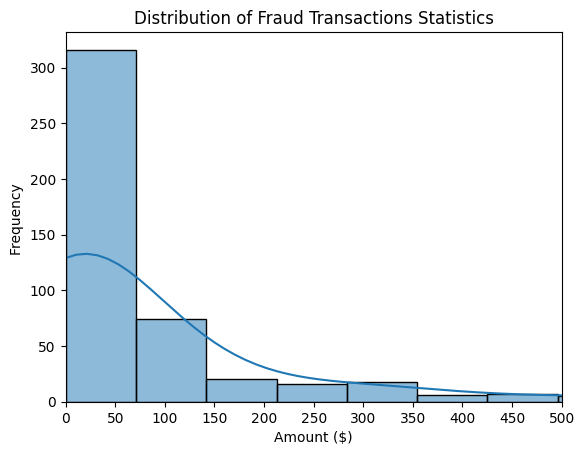

In [30]:
# Descritive statistics about the amount of fraud transactions
fraud_transactions = credit_card[credit_card['Class'] == 1]
fraud_stats = round(fraud_transactions['Amount'].describe(),2)
print("Fraud Transactions Statistics:")
print(fraud_stats)

# histogram about fraud transactions and your amounts under 500 )most of the value is in this range 
sns.histplot(fraud_transactions['Amount'], kde=True, bins=30)
plt.title('Distribution of Fraud Transactions Statistics')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency ')

plt.xlim(0, 500)

plt.xticks(ticks=range(0, 501, 50)) 

plt.show()



Another analysis that is possible to do is in relation to the value of fraudulent transactions. Fraudulent transactions on credit cards often follow a pattern, a value range that is often considered low so as not to attract too much attention.

In [31]:
display(cleanedData)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Starting to work with AI, making a model to predict transactions (fraud or not)

In [32]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [33]:
y = cleanedData["Class"] #predict column

# x -> base of our predict,
x = cleanedData.drop(columns=["Class"])

# spliting the data in test and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced') #balanced because we have much more not fraud than fraud
rf_model.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
y_pred = rf_model.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix


classification_rep = classification_report(y_test, y_pred, target_names=["Real", "Fraud"])
print("Classification:\n", classification_rep)

Classification:
               precision    recall  f1-score   support

        Real       1.00      1.00      1.00     71089
       Fraud       0.96      0.75      0.84       113

    accuracy                           1.00     71202
   macro avg       0.98      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



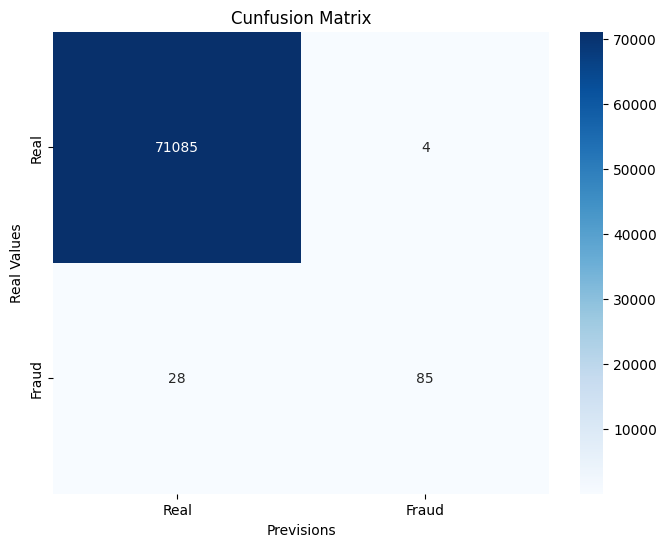

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fraud"], yticklabels=["Real", "Fraud"])
plt.title("Cunfusion Matrix")
plt.xlabel("Previsions")
plt.ylabel("Real Values")
plt.show()

71085 (True Negatives - TN):
The model predicted “Real” (not fraud), and the true value was also “Real”. These are correct cases where the model correctly classified non-fraudulent transactions.

85 (True Positives - TP):
The model predicted “Fraud”, and the true value was also “Fraud”.
These are the correct cases where the model correctly identified fraudulent transactions.

28 (False Negatives - FN):
The model predicted “Real” (not fraud), but the true value was “Fraud”. The model failed to identify fraud.

4 (False Positives - FP):
The model predicted “Fraud”, but the true value was “Real”.
The model incorrectly classified a non-fraudulent transaction as fraud.

The model performs excellently in identifying non-fraudulent transactions (71,085 correct answers).
It identifies fraud well, even with 28 cases where it did not identify it correctly. The explanation for this is the amount of imbalanced data, a much higher proportion of non-fraudulent transactions.

In [38]:
# let's see the correlation of the variables
correlation_matrix=cleanedData.corr()




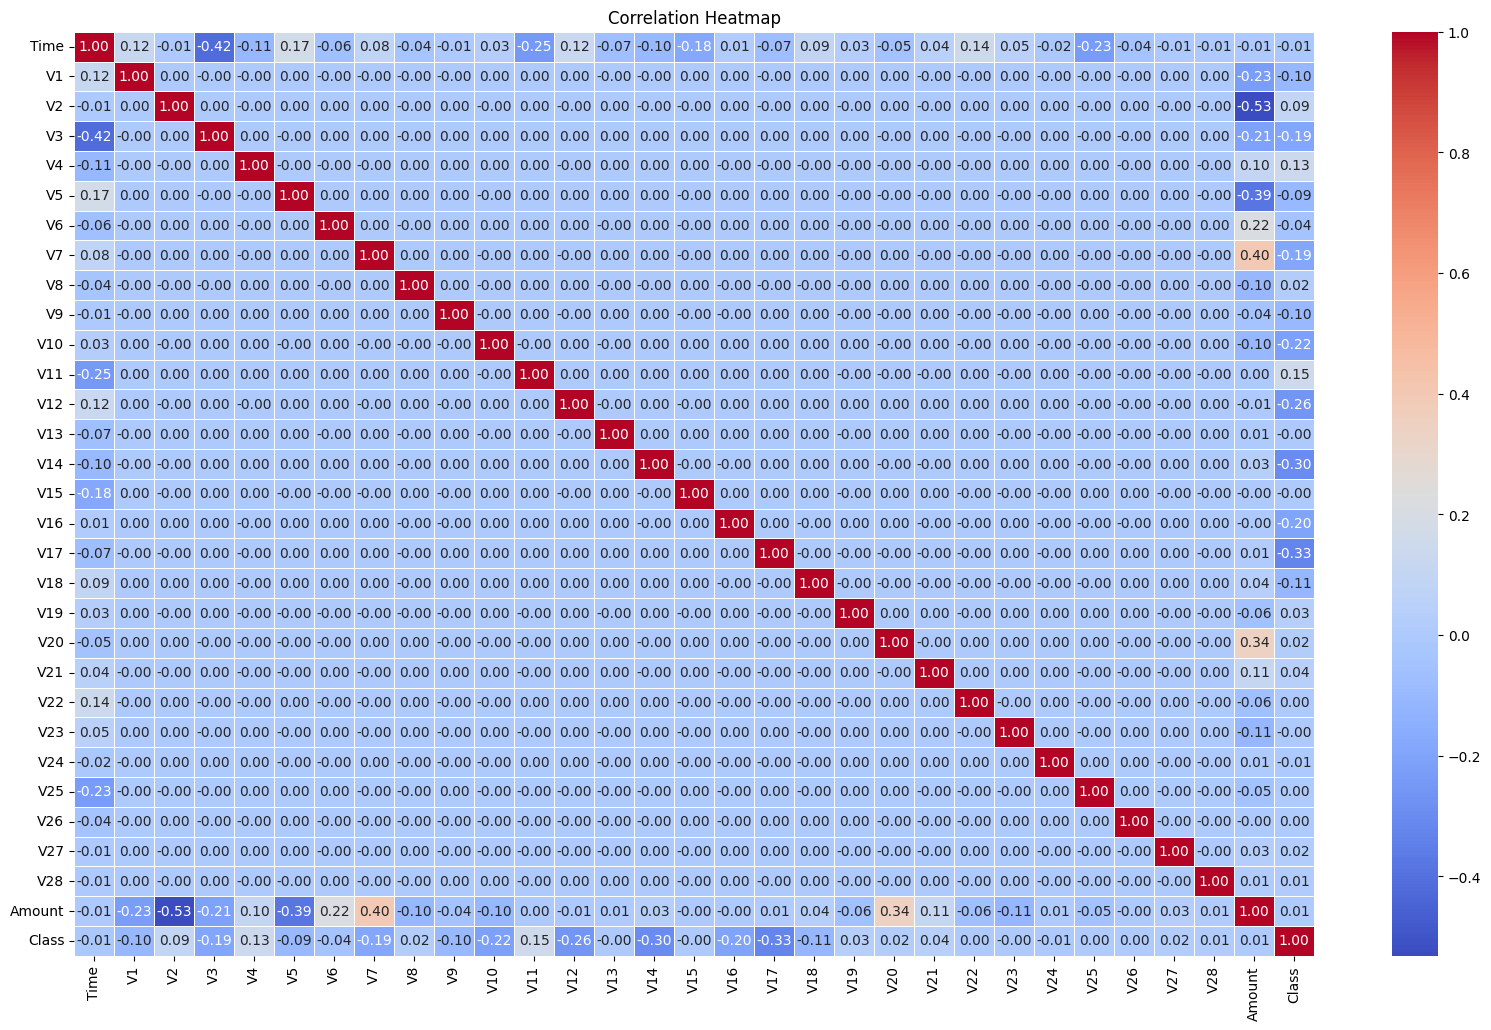

In [39]:
import matplotlib.pyplot as plt
 # bibilioteca de visualizacao de dados
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()